In [1]:
#Importing Libraries
# %matplotlib inline- To show plots below code only, not in another window
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline                

In [2]:
#Loading CSV file
train = pd.read_csv('train.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Find most appeared value in Embarked
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
# 'S' it is replacing 2 of the null values with S
train['Embarked'].fillna('S',inplace=True)

In [7]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Out of 891 62.0% people died in the accident


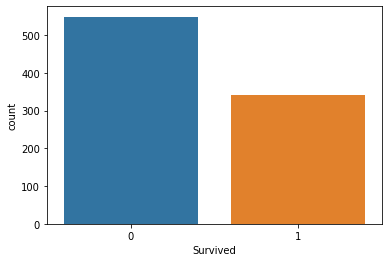

In [10]:
#Univariate analysis of Survived Column
sns.countplot(train['Survived'])
death_percent=round((train['Survived'].value_counts().values[0]/891)*100)
print("Out of 891 {}% people died in the accident".format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


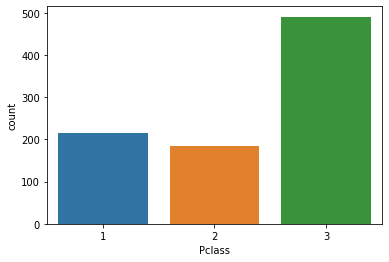

In [11]:
#Pclass Column
print((train['Pclass'].value_counts()/891)*100)
sns.countplot(train['Pclass'])
#Below results suggest that may be fare difference between 1 and 2 was low as compared to it was for 2 and 3

male      64.758698
female    35.241302
Name: Sex, dtype: float64


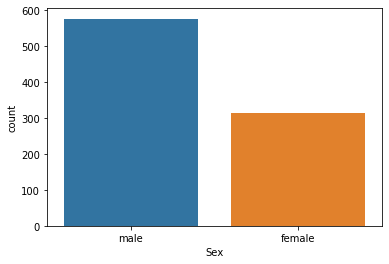

In [12]:
#Sex Column
print((train['Sex'].value_counts()/891)*100)
sns.countplot(train['Sex'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


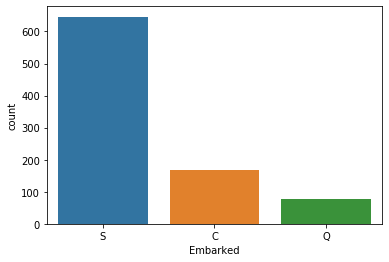

In [13]:
#Embarked (which city people started from) Column
#S-> Southamption; C-> Cherbourg; Q-> Queenstown

print((train['Embarked'].value_counts()/891)*100)
sns.countplot(train['Embarked'])

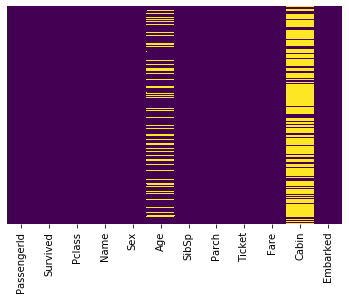

In [14]:
#plot to check out null values in dataset
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

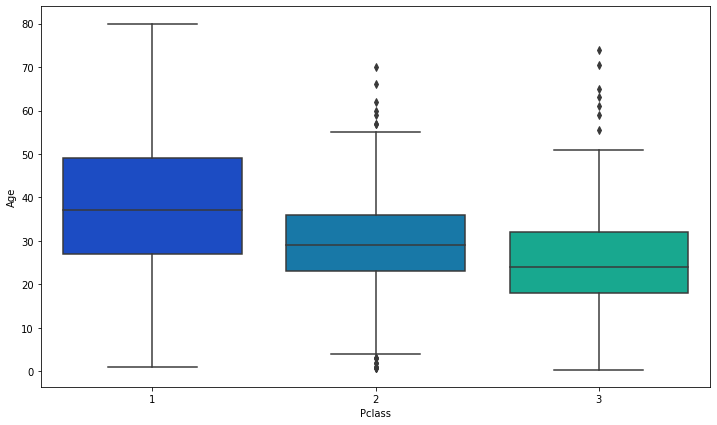

In [15]:
#boxplot for figuring out 50% age for each pclass to fill null values in age column
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [7]:
#function to replace null values in age column with above observed values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
#Use of impute_age function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [9]:
train['Age']=train['Age'].astype('int')

0.5420736897536542
0.7871265139324608


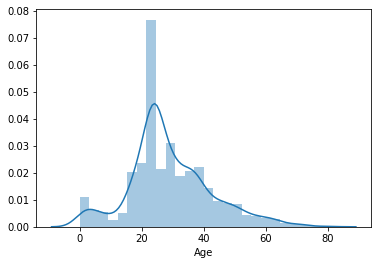

In [19]:
#Age Column
sns.distplot(train['Age'])
print(train['Age'].skew())
print(train['Age'].kurt())         #kurtosis of curve peakedness of distribution

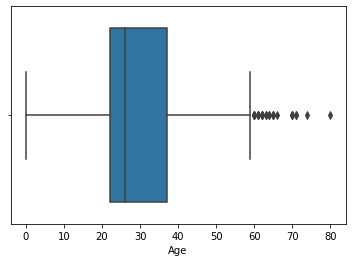

In [20]:
sns.boxplot(train['Age'])

4.787316519674893
33.39814088089868


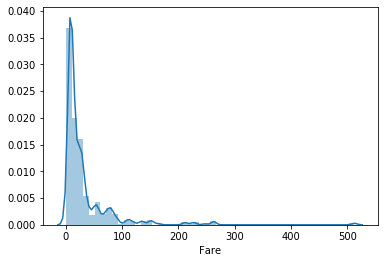

In [21]:
#Fare Column
sns.distplot(train['Fare'])
print(train['Fare'].skew())
print(train['Fare'].kurt())

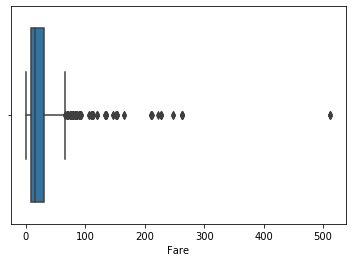

In [22]:
sns.boxplot(train['Fare'])

More people went for cheaper tickets

# Multivariate Analysis

Pclass,1,2,3
Age,,,
0,14.3,42.9,42.9
1,0.0,28.6,71.4
2,10.0,20.0,70.0
3,0.0,50.0,50.0
4,10.0,20.0,70.0
...,...,...,...
66,0.0,100.0,0.0
70,33.3,33.3,33.3
71,100.0,0.0,0.0


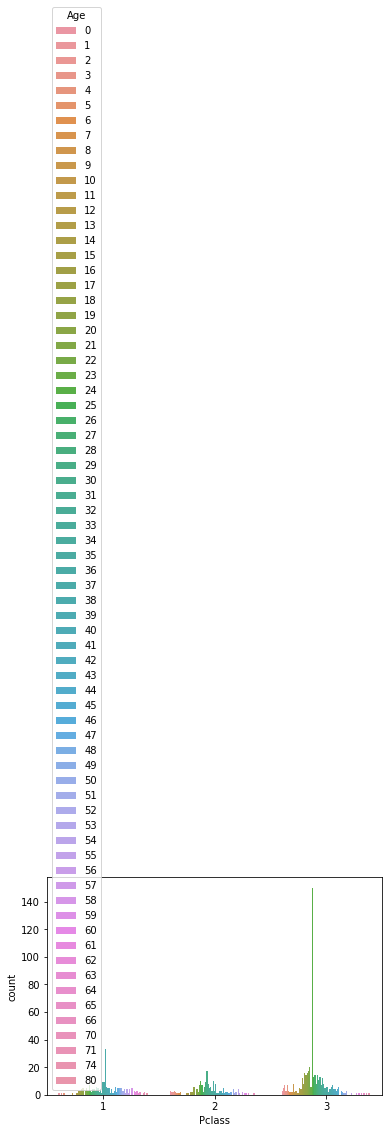

In [46]:
#Pclass with Age
sns.countplot(train['Pclass'],hue=train['Age'])
pd.crosstab(train['Age'], train['Pclass']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

From above plot it can be said that people in Pclass=3 are likely to be young

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


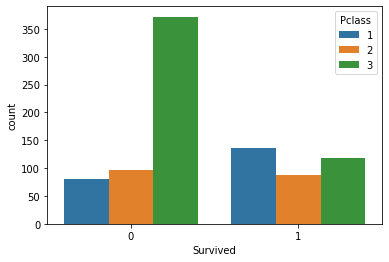

In [23]:
#Survival with Pclass
sns.countplot(train['Survived'],hue=train['Pclass'])
pd.crosstab(train['Pclass'], train['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


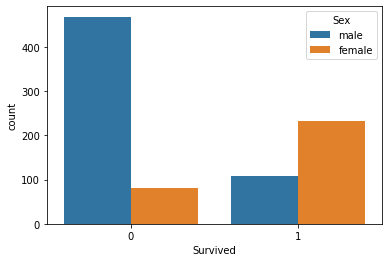

In [24]:
#Survival with Sex
sns.countplot(train['Survived'],hue=train['Sex'])
pd.crosstab(train['Sex'], train['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


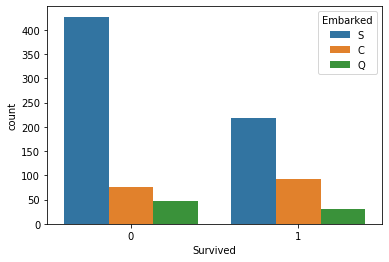

In [25]:
#Survival with Embarked
sns.countplot(train['Survived'],hue=train['Embarked'])
pd.crosstab(train['Embarked'], train['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

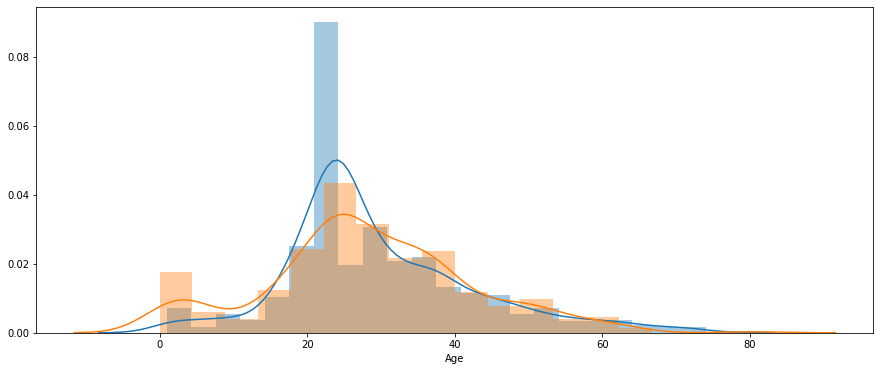

In [27]:
#Survived with Age
plt.figure(figsize=(15,6))
sns.distplot(train[train['Survived']==0]['Age'])
sns.distplot(train[train['Survived']==1]['Age'])

Blue for survived =0 and Orange for Survived=1

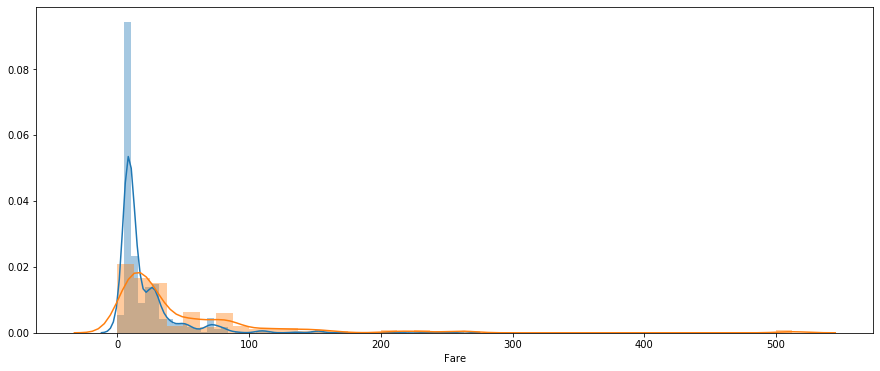

In [28]:
#Survived with Fare
plt.figure(figsize=(15,6))
sns.distplot(train[train['Survived']==0]['Fare'])
sns.distplot(train[train['Survived']==1]['Fare'])

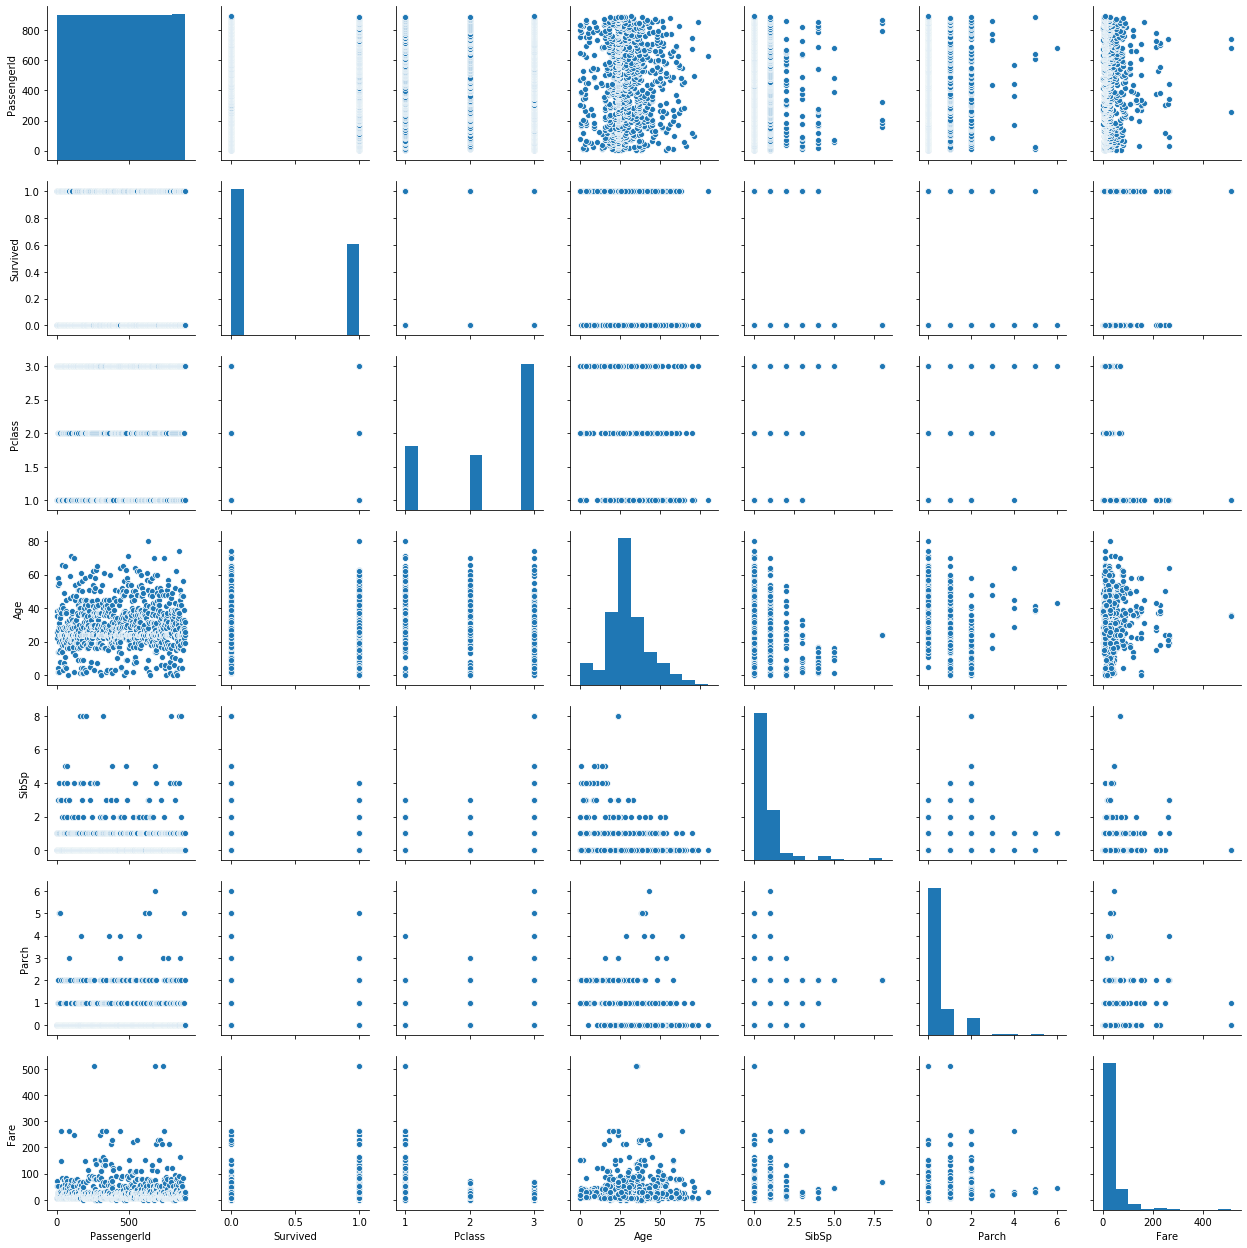

In [29]:
sns.pairplot(train)                    #scatter plot across all columns

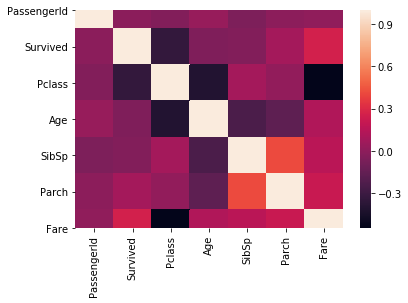

In [31]:
sns.heatmap(train.corr())

In [34]:
#Making one single column for both ParCh and SibSp
train['Family_size']=train['Parch']+train['SibSp']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


In [35]:
def family_type(number):
    if number==0:
        return 'Alone'
    elif number>=0 and number<=4:
        return 'Medium'
    else:
        return 'Large'

In [37]:
train['Family_type']=train['Family_size'].apply(family_type)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,Alone


In [38]:
train.drop(columns=['SibSp','Parch','Family_size'],inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,NaN,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C85,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C123,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,NaN,S,Alone


In [39]:
pd.crosstab(train['Family_type'], train['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


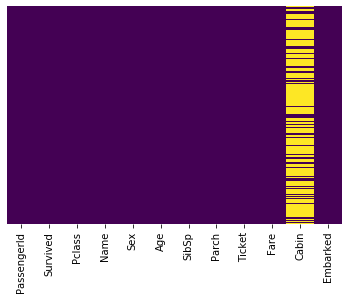

In [10]:
#Plot to check if all null values in age column filled or not
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
#Conversion of categorical variables to numerical
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [12]:
#Assign Age column directly as it is already numerical
age = train['Age']

In [13]:
#Putting together all 4(age,male,Q,S) to make required input dataset
x_train = pd.concat([age,sex,embark],axis=1)

In [14]:
x_train.head(10)

,Age,male,Q,S
0,22,1,0,1
1,38,0,0,0
2,26,0,0,1
3,35,0,0,1
4,35,1,0,1
5,24,1,1,0
6,54,1,0,1
7,2,1,0,1
8,27,0,0,1
9,14,0,0,0


In [15]:
#output variable
y_train=train['Survived']

In [16]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Without doing train-test split
Using all data for training

# Logistic Regression based on - Logistic Function
# Logistic Function based on - Sigmoid Function
Logistic rehression uses an equation as representation like linear regression. Input values are combined linearly using weights
or coefficient values to predict an output value

In [28]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\PIYUSH DHAKAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
#Save Model
import pickle
pickle_out = open("log_model.pkl","wb")
pickle.dump(logmodel, pickle_out)
pickle_out.close()

In [51]:
logmodel.predict([[34,0,0,0]])

array([1], dtype=int64)

# Using Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_train,y_train,test_size=0.2,random_state=121)

In [34]:
from sklearn.linear_model import LogisticRegression
logmodel_tts = LogisticRegression(max_iter=100,n_jobs=1,tol=0.0001,class_weight='balanced')
logmodel_tts.fit(X_Train,Y_Train)
predictions_tts = logmodel_tts.predict(X_Test)

C:\Users\PIYUSH DHAKAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
from sklearn.metrics import confusion_matrix

acc_conf=confusion_matrix(Y_Test,predictions_tts)
print(acc_conf)
print()


from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_Test,predictions_tts)
print(accuracy)
print()


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#precision_recall_fscore_support(Y_Test, predictions_tts, average='macro'
print("Precision: ",precision_score(Y_Test,predictions_tts))
print("Recall: ",recall_score(Y_Test,predictions_tts))

[[88 19]
 [25 47]]

0.7541899441340782

Precision:  0.7121212121212122
Recall:  0.6527777777777778


# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=100,random_state=90)

regressor.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=90, verbose=0,
                       warm_start=False)

In [40]:
rfc_predict= regressor.predict(X_Test)
#from sklearn.metrics import confusion_matrix

acc_conf=confusion_matrix(Y_Test,rfc_predict)
print(acc_conf)
print()


#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_Test,rfc_predict)
print(accuracy)
print()


#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#precision_recall_fscore_support(Y_Test, predictions_tts, average='macro'
print("Precision: ",precision_score(Y_Test,rfc_predict))
print("Recall: ",recall_score(Y_Test,rfc_predict))

[[83 24]
 [25 47]]

0.7262569832402235

Precision:  0.6619718309859155
Recall:  0.6527777777777778


# Filling the missing data in test dataset

In [31]:
test = pd.read_csv('test.csv')

In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


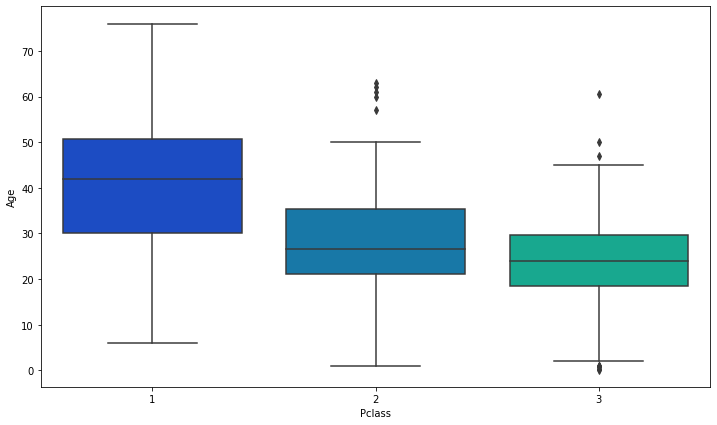

In [39]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

In [41]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 28

        else:
            return 24

    else:
        return Age

In [42]:
test['Age'] = test[['Age','Pclass']].apply(impute_age_test,axis=1)

In [43]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)
age_test = test['Age']

In [44]:
x_test= pd.concat([age_test,sex_test,embark_test],axis=1)

In [45]:
predictions = logmodel.predict(x_test)

In [47]:
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
